In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style

In [2]:
# IMPORTING DATA

df = pd.read_csv('Resources/Data/BrooklynHomesPostgres.csv', index_col=0)
df.head(5)

/var/folders/zq/zj22llm50v105v327lqpc9w40000gn/T/ipykernel_20065/3811017025.py:3: DtypeWarning: Columns (8,34,36,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Resources/Data/BrooklynHomesPostgres.csv', index_col=0)


,borough,neighborhood,building_class_category,block,lot,building_class,address,apartment_number,zip_code,residential_units,...,BldgFront,BldgDepth,Ext,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,HistDist,Landmark
id,,,,,,,,,,,,,,,,,,,,,
316,3,BOERUM HILL,02 TWO FAMILY HOMES,180,60,S2,525 ATLANTIC AVENUE,NaN,11217,2,...,25.0,79.0,NaN,5685.0,35970.0,0.0,0.0,1905.0,NaN,NaN
389,3,GOWANUS,02 TWO FAMILY HOMES,1015,43,C7,470 4TH AVENUE,5.0,11215,13,...,126.0,120.0,NaN,910350.0,2826386.0,702036.0,2618072.0,2015.0,NaN,NaN
398,3,PARK SLOPE SOUTH,03 THREE FAMILY HOMES,1047,3,C0,555 4 AVENUE,NaN,11215,3,...,0.0,0.0,NaN,106200.0,106200.0,0.0,0.0,0.0,NaN,NaN
469,3,GREENPOINT,02 TWO FAMILY HOMES,2505,3,S2,1050 MANHATTAN AVENUE,NaN,11222,2,...,25.0,40.0,NaN,9606.0,36504.0,0.0,0.0,1931.0,NaN,NaN
576,3,COBBLE HILL,01 ONE FAMILY HOMES,286,41,A9,177 PACIFIC STREET,NaN,11201,1,...,25.0,100.0,NaN,35923.0,101124.0,0.0,0.0,1931.0,Cobble Hill Historic District,NaN


In [3]:
# EDA
clean_df = df[['block','zip_code','gross_sqft','year_built','sale_price','SchoolDist', 'year_of_sale','NumFloors','Council','GarageArea','StrgeArea','UnitsTotal']]
clean_df = clean_df.dropna()
clean_df.head(5)

,block,zip_code,gross_sqft,year_built,sale_price,SchoolDist,year_of_sale,NumFloors,Council,GarageArea,StrgeArea,UnitsTotal
id,,,,,,,,,,,,
316,180,11217,4225,1905,23000000,15.0,2013,3.0,33.0,0.0,0.0,3.0
389,1015,11215,46000,1920,20000000,15.0,2014,12.0,39.0,0.0,0.0,107.0
398,1047,11215,2700,1899,19875000,15.0,2016,0.0,39.0,0.0,0.0,0.0
469,2505,11222,3000,1931,18000000,14.0,2015,3.0,33.0,0.0,0.0,3.0
576,286,11201,10000,1931,15500000,15.0,2015,3.0,39.0,0.0,0.0,1.0


In [4]:
clean_df.describe()

,block,zip_code,gross_sqft,year_built,sale_price,SchoolDist,year_of_sale,NumFloors,Council,GarageArea,StrgeArea,UnitsTotal
count,77682.000000,77682.000000,77682.000000,77682.000000,7.768200e+04,77682.000000,77682.000000,77682.000000,77682.000000,77682.000000,77682.000000,77682.000000
mean,4866.231341,11220.389563,2371.549844,1924.323383,7.218647e+05,19.533354,2011.014727,2.233801,41.565163,1.027059,0.803648,2.010144
std,2519.792659,58.052223,1148.805721,90.937578,6.283826e+05,3.943653,4.333340,0.756451,4.386930,69.281946,70.192626,1.663882
min,30.000000,0.000000,0.000000,0.000000,1.450000e+05,13.000000,2003.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,2368.000000,11210.000000,1666.000000,1910.000000,3.990000e+05,17.000000,2008.000000,2.000000,37.000000,0.000000,0.000000,1.000000
50%,5187.000000,11221.000000,2232.000000,1925.000000,5.760000e+05,20.000000,2012.000000,2.000000,42.000000,0.000000,0.000000,2.000000
75%,7078.000000,11232.000000,2940.000000,1935.000000,8.300000e+05,22.000000,2015.000000,2.750000,46.000000,0.000000,0.000000,2.000000
max,8955.000000,11416.000000,76422.000000,2017.000000,2.300000e+07,32.000000,2017.000000,119.000000,48.000000,8852.000000,17084.000000,213.000000


In [5]:
clean_df.dtypes

block             int64
zip_code          int64
gross_sqft        int64
year_built        int64
sale_price        int64
SchoolDist      float64
year_of_sale      int64
NumFloors       float64
Council         float64
GarageArea      float64
StrgeArea       float64
UnitsTotal      float64
dtype: object

In [6]:
#clean_df['SchoolDist'] = pd.to_numeric(clean_df['SchoolDist'], errors = 'coerce')
#clean_df['SchoolDist'] = clean_df['SchoolDist'].astype('int64')
#clean_df['NumFloors'] = pd.to_numeric(clean_df['NumFloors'], errors = 'coerce')
#clean_df['NumFloors'] = clean_df['NumFloors'].astype('int64')
#clean_df['Council'] = pd.to_numeric(clean_df['Council'], errors = 'coerce')
#clean_df['Council'] = clean_df['Council'].astype('int64')
#clean_df['GarageArea'] = pd.to_numeric(clean_df['GarageArea'], errors = 'coerce')
#clean_df['GarageArea'] = clean_df['GarageArea'].astype('int64')
#clean_df['StrgeArea'] = pd.to_numeric(clean_df['StrgeArea'], errors = 'coerce')
#clean_df['StrgeArea'] = clean_df['StrgeArea'].astype('int64')
#clean_df['UnitsTotal'] = pd.to_numeric(clean_df['UnitsTotal'], errors = 'coerce')
#clean_df['UnitsTotal'] = clean_df['UnitsTotal'].astype('int64')
#clean_df.dtypes

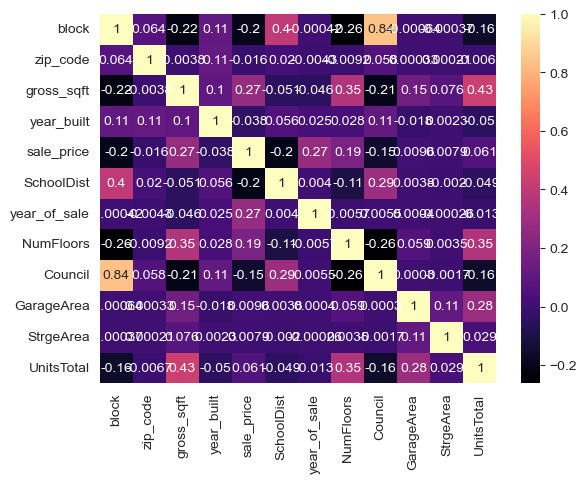

In [7]:
#1. Heatmap
sb.heatmap(clean_df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

/var/folders/zq/zj22llm50v105v327lqpc9w40000gn/T/ipykernel_20065/3426907659.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(clean_df['sale_price'], color = 'r')


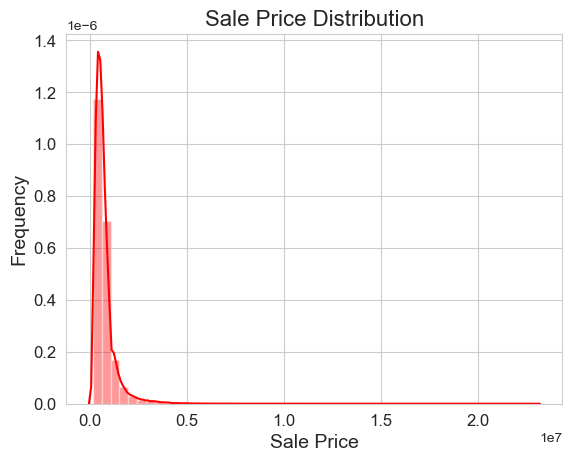

In [8]:
# 2. Distribution plot
sb.distplot(clean_df['sale_price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [15]:
# FEATURE SELECTION & DATA SPLIT

X = clean_df[['block','zip_code','gross_sqft','year_built','sale_price','SchoolDist', 'year_of_sale','NumFloors','Council','GarageArea','StrgeArea','UnitsTotal']].values
y = clean_df['sale_price'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=42)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[6.07300e+03 1.12280e+04 2.31400e+03 1.96500e+03 7.35000e+05 2.00000e+01
  2.01200e+03 2.00000e+00 4.30000e+01 0.00000e+00 0.00000e+00 2.00000e+00]
 [4.93300e+03 1.12030e+04 1.33000e+03 1.91000e+03 3.16041e+05 1.70000e+01
  2.01300e+03 2.75000e+00 4.50000e+01 0.00000e+00 0.00000e+00 1.00000e+00]
 [7.76800e+03 1.12100e+04 1.43600e+03 1.91500e+03 2.94500e+05 2.20000e+01
  2.00300e+03 2.00000e+00 4.50000e+01 0.00000e+00 0.00000e+00 1.00000e+00]
 [7.97500e+03 1.12340e+04 3.07400e+03 1.96000e+03 5.45000e+05 1.80000e+01
  2.01600e+03 2.00000e+00 4.60000e+01 0.00000e+00 0.00000e+00 2.00000e+00]
 [4.30100e+03 1.12070e+04 1.17600e+03 1.92000e+03 2.20000e+05 1.90000e+01
  2.01000e+03 2.00000e+00 4.20000e+01 0.00000e+00 0.00000e+00 1.00000e+00]]
X_test samples :  [[1.9270e+03 1.1205e+04 1.8900e+03 1.9010e+03 2.1500e+05 1.3000e+01
  2.0030e+03 2.0000e+00 3.3000e+01 0.0000e+00 0.0000e+00 3.0000e+00]
 [1.5010e+03 1.1233e+04 2.3100e+03 1.8990e+03 1.2350e+06 1.6000e+01
  2.0170e+03

In [16]:
y.shape

(77682,)

In [17]:
# MODELING

# 1. OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

#Random Forest
#XGBoost

In [18]:
ridge.score(X_test, y_test)*100

100.0

In [19]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 1.0
-------------------------------------------------------------------------------


In [20]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 1.0
-------------------------------------------------------------------------------
R-Squared of Ridge model is 1.0
-------------------------------------------------------------------------------
R-Squared of Lasso model is 1.0
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 1.0
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 1.0
-------------------------------------------------------------------------------
